<div style="text-align:center; margin-top: 1cm;">
    <h2>Київський політехнічний інститут імені Ігоря Сікорського</h2>
    <h2>Приладобудівний факультет</h2>
    <h3>Кафедра автоматизації та систем неруйнівного контролю</h3>
    <br><br><br>
</div>

<div style="text-align:center; margin-top: 5cm;">
    <h2>Практична робота №7 </h2>
    <h2>з предмету "Комп'ютерний зір"</h2>
</div>

<div style="text-align:right; margin-top: 5cm;">
<p>Студент: Погорєлов Богдан<br>
    Група: ПК-51мп<br>
</p>
</div>
<div style="text-align:center; margin-top: 5cm;">
2025 рік  <br><br><br><br>
</div>

Тема: Детекція облич та очей методом Haar Cascade

Мета: Розробити програму для автоматичного знаходження облич та очей на груповому фото (мінімум 5 осіб) з використанням бібліотеки OpenCV.

Розробити програму, яка виконує такі дії з ЦЗ:
1. Вхідні дані - самостійно отримана цифрова фотографія, яка містить не менше 5 обличь людей.
2. Програма знаходить положення обличь людей та очей людей за допомогою алгоритму Хаар каскад (Haar
cascade).
4. Програма відображає положення обличь та очей людей в вихідному ЦЗ

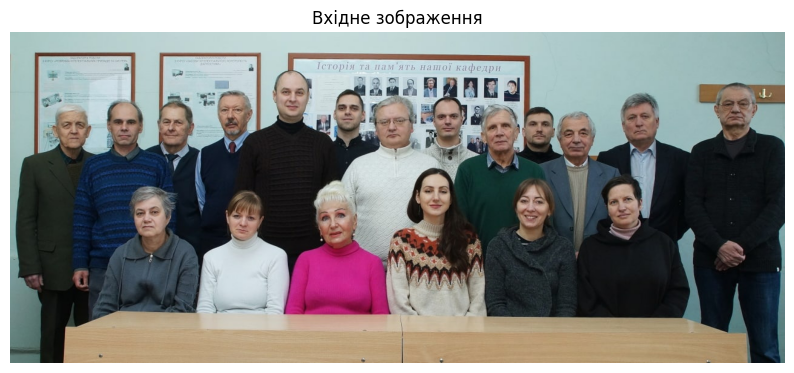

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
# from io import BytesIO
# from PIL import Image

# img = cv2.imread('../img/asnk.kpi.ua.jpeg', cv2.IMREAD_GRAYSCALE)
img = cv2.imread('../img/asnk.kpi.ua.jpeg')

# Перетворюємо в сірий колір (потрібно для Haar Cascade)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Вхідне зображення")
plt.axis('off')
plt.show()

In [12]:
# 2. Детекція облич та очей (Code Cell)
# Завантаження каскадів
face_xml = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
eye_xml = cv2.data.haarcascades + 'haarcascade_eye.xml'

face_cascade = cv2.CascadeClassifier(face_xml)
eye_cascade = cv2.CascadeClassifier(eye_xml)

result_img = img.copy() # Працюємо з копією
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 1. Детекція облич
faces = face_cascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30)
)

print(f"Знайдено облич: {len(faces)}")

Знайдено облич: 19


In [16]:
eyes_count = 0
for (x, y, w, h) in faces:
    # Малюємо рамку обличчя
    cv2.rectangle(result_img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    # Виділяємо зону обличчя (ROI)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = result_img[y:y+h, x:x+w]
    
    # 2. Детекція очей
    eyes = eye_cascade.detectMultiScale(
        roi_gray,
        scaleFactor=1.1,
        minNeighbors=2,  
        minSize=(4, 4) 
    )
    

    for (ex, ey, ew, eh) in eyes:
        eyes_count+=1
        cv2.rectangle(
            roi_color, 
            (ex, ey), 
            (ex+ew, ey+eh), 
            (255, 0, 0), 
            1
        )
print(f'Знайлено очей {eyes_count}')

Знайлено очей 10


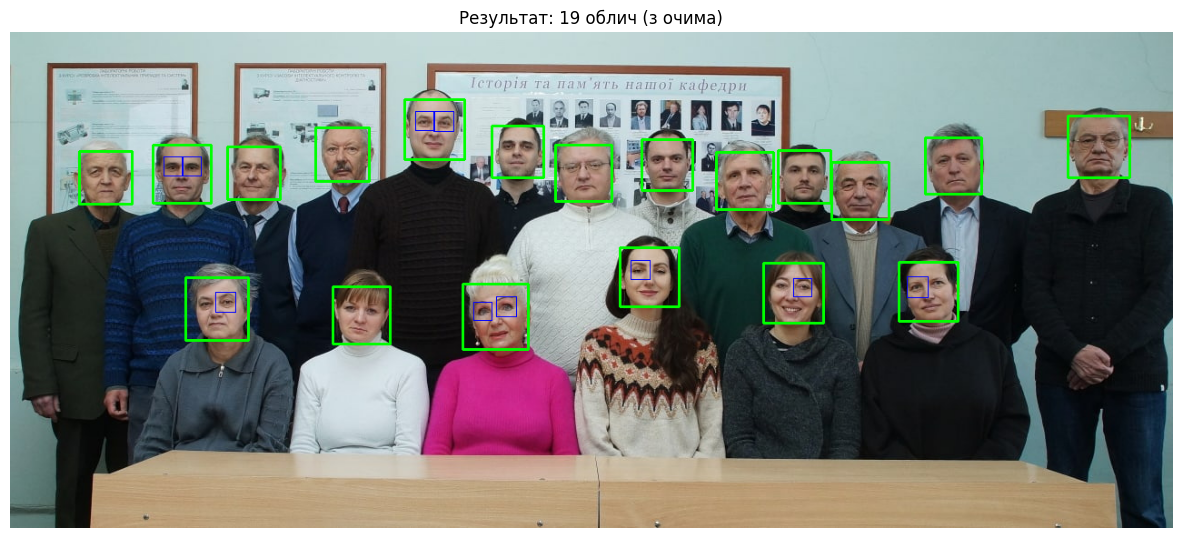

In [17]:
# Відображення
plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
plt.title(f"Результат: {len(faces)} облич (з очима)")
plt.axis('off')
plt.show()

Висновки

В ході виконання практичної роботи було реалізовано програмне забезпечення для детекції облич та очей на груповій фотографії за допомогою методу Haar Cascades бібліотеки OpenCV.

Аналіз результатів роботи програми:

Детекція облич (Зелені рамки):

Алгоритм продемонстрував високу ефективність. На вхідному зображенні було успішно знайдено та локалізовано 19 облич.

Класифікатор haarcascade_frontalface_default добре впорався з різним масштабом облич (люди знаходяться на передньому та задньому планах) та незначними нахилами голів. Жодного обличчя не було пропущено, хибних спрацювань (детекції фону як обличчя) не зафіксовано.

Детекція очей (Сині рамки):

Результат детекції очей виявився неоднорідним. На зображенні видно, що очі були успішно знайдені переважно у людей на передньому плані (жінки в нижньому ряду) та у деяких людей з другого ряду.

Для людей на задньому плані (верхній ряд) детекція очей спрацювала значно гірше або не спрацювала зовсім.

Причини часткового розпізнавання очей:

Низька роздільна здатність: Оскільки люди на задньому плані знаходяться далі, область їхніх очей займає критично малу кількість пікселів. Навіть при налаштуваннях minSize=(3, 3), деталізації недостатньо для впевненого спрацювання ознак Хаара.

Освітлення та тіні: Надбрівні дуги створюють тіні, які зменшують контрастність, необхідну алгоритму (він шукає перепад "темне око" — "світла шкіра").

Окуляри: У чоловіка крайнього праворуч (верхній ряд) очі не знайдено, ймовірно, через наявність окулярів, які спотворюють контури та додають відблиски.

Вплив параметрів:

Зменшення параметру minNeighbors до 2-4 дозволило знайти очі там, де стандартні налаштування не спрацьовували, проте це все одно не гарантує 100% результату на групових фото з низькою деталізацією облич.

Підсумок: Метод каскадів Хаара є швидким та ефективним для пошуку облич, але його надійність при пошуку дрібних деталей (очей) суттєво залежить від роздільної здатності зображення та умов освітлення.